In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

[2.20049536e-02 4.40096871e-02 2.33224264e-02 8.80409338e-04
 1.98016691e-02 6.94193152e-06 2.75540193e-02 5.51080387e-02
 1.54302508e-02 1.10216077e-03]


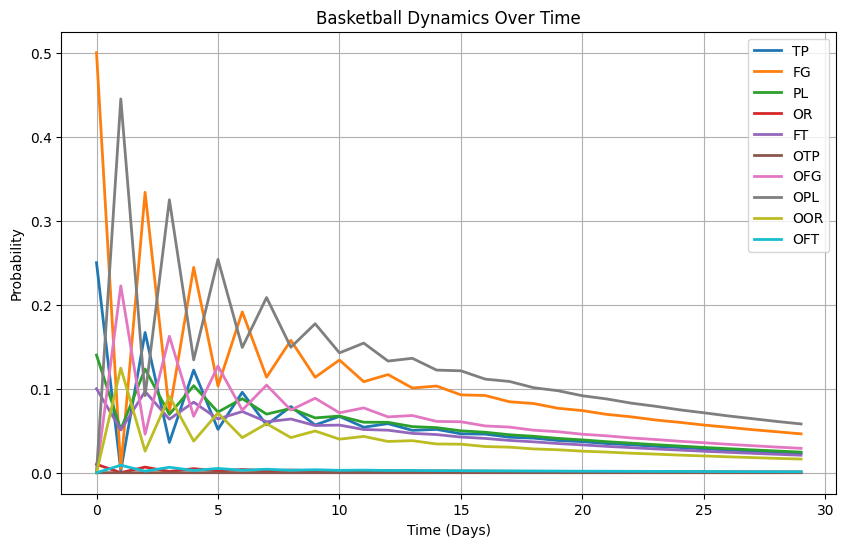

In [27]:
# Simulating a basketball game

# Three pointer, field goal, pocession lost, free throw, opponent three, opponent field goal, 
# opponenent pocession lost, opponent offensive rebound, opponent free throw
states = ["TP", "FG", "PL", "OR", "FT", "OTP", "OFG", "OPL", "OOR", "OFT"]
probabilities = np.array([0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0])  


transition_matrix = np.array([
    # TP    FG    PL    OR    FT   OTP  OFG  OPL  OOR  OFT
    [0,  0,  0,  0,  0, 0.0001, 0.25, 0.5, 0.14, 0.01],  # TP
    [0,  0,  0,  0,  0, 0.0001, 0.25, 0.5, 0.14, 0.01],  # FG
    [0,  0,  0,  0,  0, 0, 0.25, 0.5, 0.14, 0.01],  # PL
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0],  # OR
    [0.00001, 0.00001, 0.5, 0.00001, 0.5, 0, 0, 0, 0, 0],  # FT 
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OTP
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OFG
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OPL
    [0,  0,  0,  0,  0, 0, 0.25, 0.5, 0.14, 0.01], # OOR
    [0.00001, 0.00001, 0.5, 0.00001, 0.5, 0, 0, 0, 0, 0] # OFT
])

# Evolving over time 
time = 30 
history = np.zeros((time, len(states)))

for i in range(time): 
    history[i] = probabilities
    probabilities = probabilities @ transition_matrix

print(probabilities)
plt.figure(figsize=(10, 6))
for i, state in enumerate(states):
    plt.plot(range(time), history[:, i], label=state, linewidth=2)

plt.xlabel("Time (Days)")
plt.ylabel("Probability")
plt.title("Basketball Dynamics Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
def simulate_basketball_game(num_plays, 
                             prob_team_a_2=0.4, prob_team_a_3=0.15,
                             prob_team_b_2=0.35, prob_team_b_3=0.2):
    """Simulates a basketball game tracking actual scores and point types.

    Args:
        num_plays: Number of plays (scoring opportunities).
        prob_team_a_2: Probability of Team A scoring 2 points.
        prob_team_a_3: Probability of Team A scoring 3 points.
        prob_team_b_2: Probability of Team B scoring 2 points.
        prob_team_b_3: Probability of Team B scoring 3 points.

    Returns:
        A list of tuples (team_a_score, team_b_score) after each play.
    """
    # Check probability sums
    prob_team_a_total = prob_team_a_2 + prob_team_a_3
    prob_team_b_total = prob_team_b_2 + prob_team_b_3

    if prob_team_a_total > 1.0 or prob_team_b_total > 1.0:
        raise ValueError("Total scoring probability for a team cannot exceed 1.0")

    # The remaining probability is "no score"
    prob_team_a = [1 - prob_team_a_total, prob_team_a_2, prob_team_a_3]
    prob_team_b = [1 - prob_team_b_total, prob_team_b_2, prob_team_b_3]

    team_a_score = 0
    team_b_score = 0
    score_history = [(team_a_score, team_b_score)]

    for _ in range(num_plays):
        # Randomly choose which team attempts the play
        scoring_team = random.choice(['A', 'B'])

        if scoring_team == 'A':
            points = random.choices([0, 2, 3], weights=prob_team_a)[0]
            team_a_score += points
        else:
            points = random.choices([0, 2, 3], weights=prob_team_b)[0]
            team_b_score += points

        score_history.append((team_a_score, team_b_score))

    return score_history


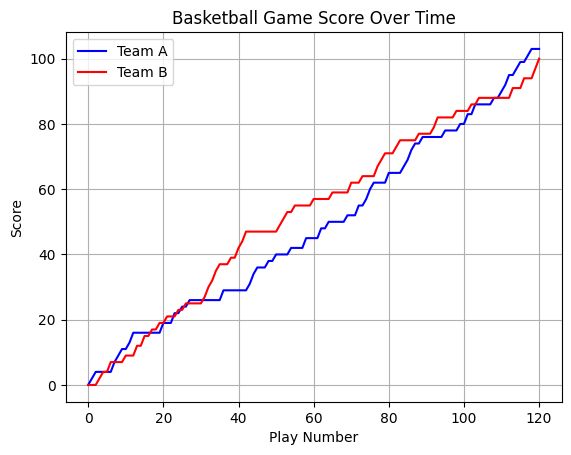

The final score is:
103 100


In [51]:
# Simulate the random walk
num_steps = 120
prob_team_a_2=0.5
prob_team_a_3=0.25
prob_team_b_2=0.5
prob_team_b_3=0.25
walk_data = simulate_basketball_game(num_steps, prob_team_a_2, prob_team_a_3, 
                                    prob_team_b_2, prob_team_b_3)
# Separate scores for each team
team_a_scores = [score[0] for score in walk_data]
team_b_scores = [score[1] for score in walk_data]

# Plot the random walk with team labels
plt.plot(team_a_scores, label="Team A", color='blue')
plt.plot(team_b_scores, label="Team B", color='red')
plt.xlabel("Play Number")
plt.ylabel("Score")
plt.title("Basketball Game Score Over Time")
plt.legend()
plt.grid(True)
plt.show()

print("The final score is:")
print(team_a_scores[-1], team_b_scores[-1])

Team B wins series


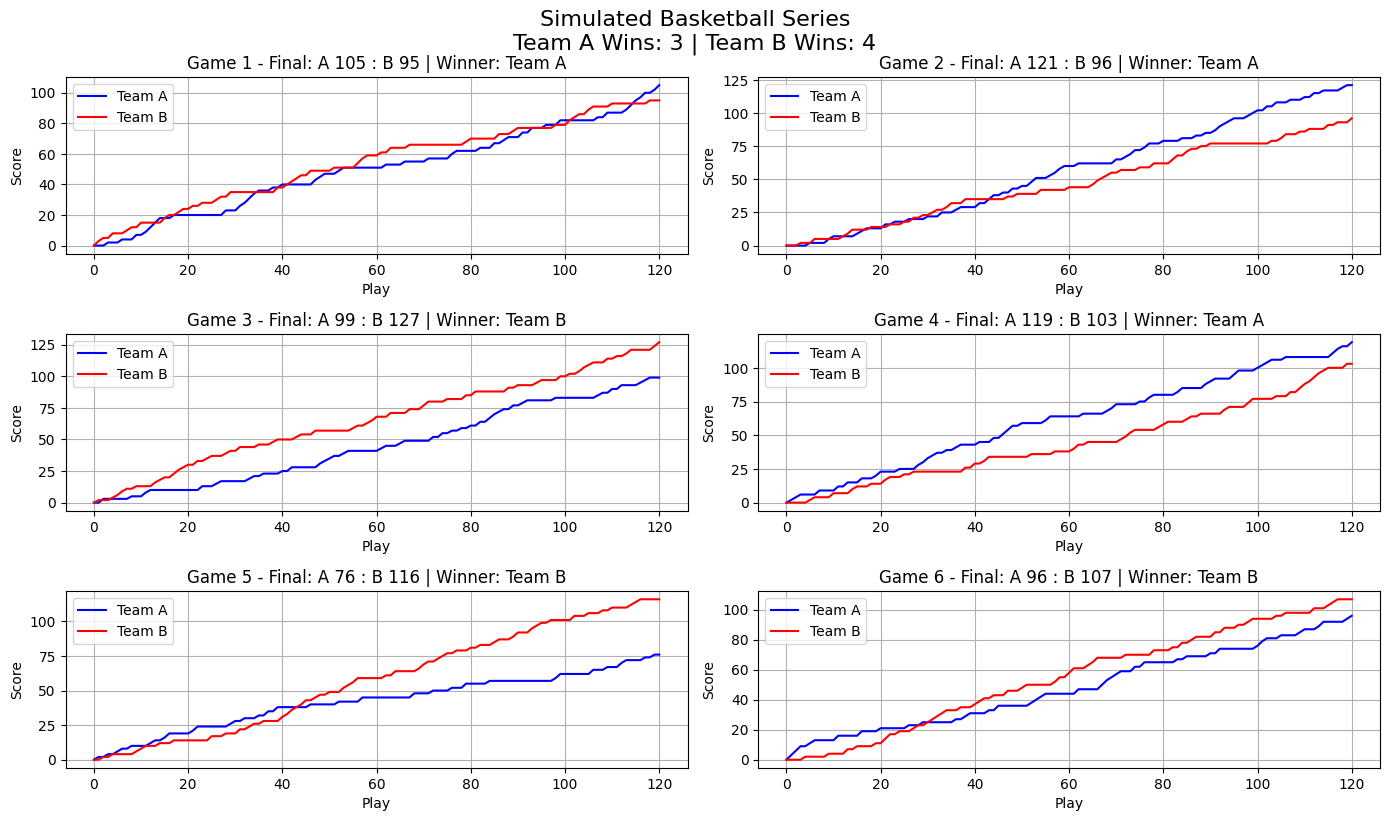

In [57]:

# Game parameters
num_steps = 120
num_games = 7
prob_team_a_2 = 0.5
prob_team_a_3 = 0.25
prob_team_b_2 = 0.5
prob_team_b_3 = 0.25

team_a_wins = 0
team_b_wins = 0

plt.figure(figsize=(14, 10))

for i in range(num_games):
    walk_data = simulate_basketball_game(num_steps, prob_team_a_2, prob_team_a_3, 
                                         prob_team_b_2, prob_team_b_3)
    
    team_a_scores = [score[0] for score in walk_data]
    team_b_scores = [score[1] for score in walk_data]

    final_a = team_a_scores[-1]
    final_b = team_b_scores[-1]
    
    winner = "A" if final_a > final_b else "B" if final_b > final_a else "Tie"
    
    if winner == "A":
        team_a_wins += 1
    elif winner == "B":
        team_b_wins += 1
        
    if team_a_wins >= 4:
        print("Team A wins series")
        break
    elif team_b_wins >= 4:
        print("Team B wins series")
        break

    # Plot each game
    plt.subplot(4, 2, i + 1)
    plt.plot(team_a_scores, label="Team A", color='blue')
    plt.plot(team_b_scores, label="Team B", color='red')
    plt.title(f"Game {i + 1} - Final: A {final_a} : B {final_b} | Winner: Team {winner}")
    plt.xlabel("Play")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)

# Add series summary title
plt.tight_layout()
plt.suptitle(f"Simulated Basketball Series\nTeam A Wins: {team_a_wins} | Team B Wins: {team_b_wins}", 
             fontsize=16, y=1.03)
plt.show()

